# 0.Import Libraries

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

np.random.seed(123)
plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_33/3854418677.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# 2.Create data

In [67]:
X, y = datasets.make_blobs(n_samples=100,n_features=2, centers=2,center_box=(-2,2),cluster_std=0.70)

<Axes: >

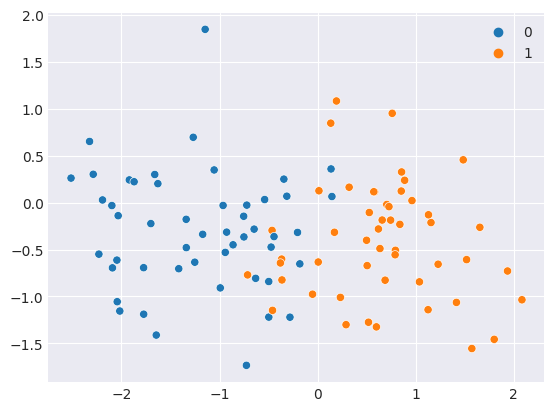

In [69]:
sns.scatterplot(x=X.T[0],y=X.T[1],hue=y)

# 3.Step Function

In [70]:
def step_function(x):
    """
        This function applies step function to given input.
    """
    if x>=0:
        return 1
    else:
        return 0

# 4.Prediction Function

In [71]:
def prediction(X, W, b):
    """
        X = input
        W = weights
        b = bias
    """
    return step_function((np.matmul(X, W) + b)[0])

# 5.Perceptron Function

In [72]:
def perceptronStep(X, y, W, b, learn_rate=0.1):
    """
        The function should receive as inputs the data X, the labels y,
        the weights W (as an array), and the bias b,
        update the weights and bias W, b, according to the perceptron algorithm,
        and return W and b.
    """
    for each_row in range(len(X)):
        y_hat = prediction(X[each_row], W, b)
        
        if y_hat != y[each_row]:
            if y_hat == 1 :
                W[0] = W[0] - (X[each_row][0] * learn_rate)
                W[1] = W[1] - (X[each_row][1] * learn_rate)
                b = b - learn_rate
            else:
                W[0] = W[0] + (X[each_row][0] * learn_rate)
                W[1] = W[1] + (X[each_row][1] * learn_rate)
                b = b + learn_rate
        return W, b
        

# 6.Training Function

In [73]:
def trainPerceptronAlgorithm(X, y, learn_rate=0.1, num_epochs=25):
    """
        This function runs the perceptron algorithm repeatedly on the dataset,
        and returns a few of the boundary lines obtained in the iterations,
        for plotting purposes.
        X = features
        y = targets
        learn_rate = learning_rate
        num_epochs = number of epochs
    """
    w = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0]
    
    boundary_lines = []
    for i in range(num_epochs):
        x_min, x_max = min(X.T[0]), max(X.T[0])
        y_min, y_max = min(X.T[1]), max(X.T[1])
        
        W = np.array(np.random.rand(2,1))
        b = np.random.rand(1)[0] + x_max 
        
        # These are the solution lines that get plotted below.
        boundary_lines = []
        for i in range(num_epochs):
            # In each epoch, we apply the perceptron step.
            W, b = perceptronStep(X, y, W, b, learn_rate)
            boundary_lines.append((-W[0]/W[1], -b/W[1]))
        return boundary_lines   

In [133]:
result = trainPerceptronAlgorithm(X, y,learn_rate=0.02,num_epochs=100)

# 7.Plot Results
## 7.1 Helper Functions

In [178]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    return x_vals, y_vals

def plot(subarray, x_lim = 3 , y_lim = 3):
    plt.xlim(-x_lim, x_lim)
    plt.ylim(-y_lim, y_lim)
    for each in range(len(subarray)):
        x_vals, y_vals = abline(subarray[each][0],subarray[each][1])
        plt.plot(x_vals, y_vals, ':', color='green')

    x_vals, y_vals = abline(result[-1][0],result[-1][1])
    plt.plot(x_vals, y_vals, color='red')
    sns.scatterplot(x=X.T[0], y=X.T[1], hue=y)

## 7.2 Plotting Random Indexes

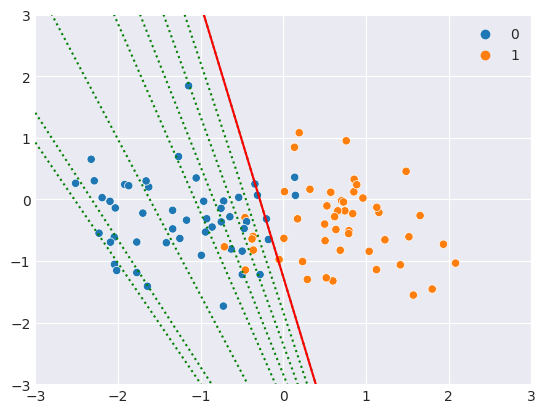

In [176]:
index = [5, 10, 30, 50, 60, 70, 80, 99]
subarray = []
for each in index:
    subarray.append(result[each])
    
plot(subarray)   

## 7.3 Plotting Last 30 Weights & Biases

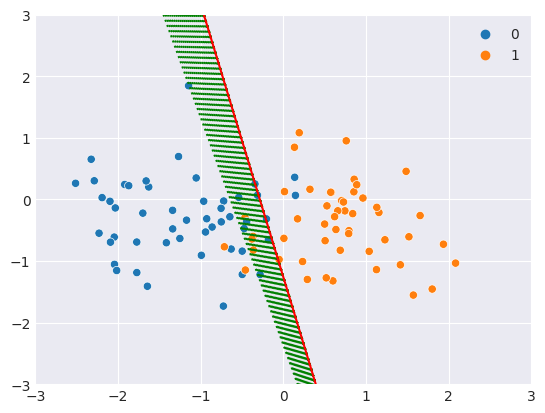

In [177]:
subarray2 = result[-30:-2]
plot(subarray2)